# Add Milky-Way extinction

Usually, one wants to draw target including the Milky Way dust extinction effect. 
Such effect can be accounted for using the `effect` option in the `from_draw()` classmethod or `Target` or using the `add_effect()` method.

### quick look at ``skysurvey.Effect``
This is based on `skysurvey.effect.Effect` object that contains 2 parts: 
  1. a `.model`  attribute that updates the Target's model (DAG)
  2. a sncosmo effect (sncosmo.PropagationEffect), with its variable name and the applied frame.


### Get the Milky Way extinction ``Effect``

The Milky way effect has been pre-defined (`skysurvey.effect.mw_extinction`) and works as follows:
  1. `mwebv` is derived from the Planck dust map (`dustmaps.planck`) given the object's RA, Dec
    so:

    `model = {"mwebv": {"func": skysurvey.effect.milkyway.get_mwebv, "kwargs":{"ra":"@ra", "dec":"@dec"}}}`

  2. The sncosmo effect is `sncosmo.CCM89Dust()` applied in the obsframe.



***
## Eample

### Draw SNe Ia without dust extinction (default)

In [20]:
import skysurvey

In [12]:
snia_no_dust = skysurvey.SNeIa.from_draw(1_000)
snia_no_dust.data.head(2)

,z,x1,c,t0,ra,dec,magabs,magobs,x0,template
0,0.18675,-2.195,0.123220,56144.281250,190.206924,12.827494,-18.770164,21.090797,0.000058,salt2
1,0.16555,0.295,0.004345,56033.667969,206.297791,65.779793,-19.359217,20.212688,0.000130,salt2


The object has no mwebv entry, and it's template has no effect, so no mwebv in the parameter name

In [17]:
sncosmo_model = snia_no_dust.get_template(as_model=True)

In [18]:
sncosmo_model.effects

[]

In [19]:
snia_no_dust.template_parameters

['z', 't0', 'x0', 'x1', 'c']

### Draw SNe Ia accounting for Milky Way dust extinction

In [21]:
from skysurvey import effects

In [22]:
snia = skysurvey.SNeIa.from_draw(1000, effect=effects.mw_extinction)

In [23]:
snia.data.head(2)

,z,x1,c,t0,ra,dec,magabs,mwebv,magobs,x0,template
0,0.17305,0.175,0.438834,56049.628906,351.960083,-39.255589,-17.934202,0.026303,21.743700,0.000032,salt2
1,0.01625,-0.735,0.045270,56095.554688,264.659637,-59.642555,-18.933451,0.143170,15.379986,0.011185,salt2


The object now has a mwebv entry that is connected to the RA and Dec

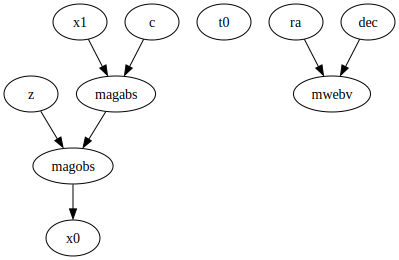

In [24]:
snia.model.visualize()

In [26]:
sncosmo_model = snia.get_template(as_model=True)
sncosmo_model.effects

In [28]:
snia.template_parameters

['z', 't0', 'x0', 'x1', 'c', 'mwebv', 'mwr_v']